In [203]:
import matplotlib.pyplot as plt
import numpy as np

In [204]:
np.random.seed(0)

dt = 0.01  # sampling interval
Fs = 1 / dt  # sampling frequency
t = np.arange(0, 10, dt)

# generate noise:
nse = np.random.randn(len(t))
r = np.exp(-t / 0.05)
cnse = np.convolve(nse, r) * dt
cnse = cnse[:len(t)]

s = 0.1 * np.sin(4 * np.pi * t) + cnse  # the signal


In [205]:
def  multiplot(t, s, Fs):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))

    # plot time signal:
    axes[0, 0].set_title("Signal")
    axes[0, 0].plot(t, s, color='C0')
    axes[0, 0].set_xlabel("Time")
    axes[0, 0].set_ylabel("Amplitude")

    # plot different spectrum types:
    axes[1, 0].set_title("Magnitude Spectrum")
    axes[1, 0].magnitude_spectrum(s, Fs=Fs, color='C1')

    axes[1, 1].set_title("Log. Magnitude Spectrum")
    axes[1, 1].magnitude_spectrum(s, Fs=Fs, scale='dB', color='C1')

    axes[2, 0].set_title("Phase Spectrum ")
    axes[2, 0].phase_spectrum(s, Fs=Fs, color='C2')

    axes[2, 1].set_title("Angle Spectrum")
    axes[2, 1].angle_spectrum(s, Fs=Fs, color='C2')

    axes[0, 1].remove()  # don't display empty ax
    fig.tight_layout()
    plt.show()

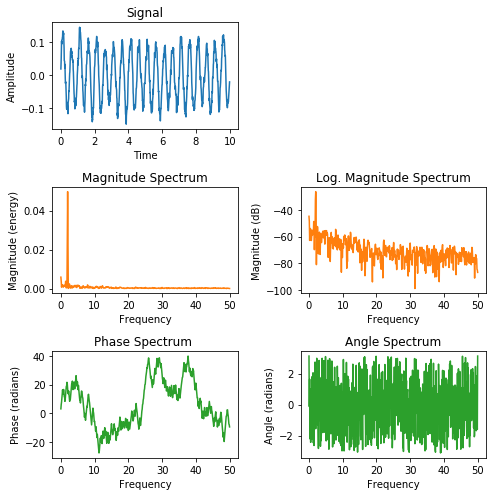

In [206]:
multiplot(t, s, Fs)

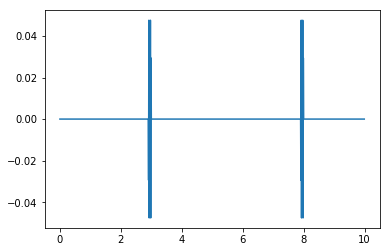

In [207]:
#Bulp noise
f = 60
builp_anom = 0.05 * np.sin(2*f * np.pi * t)  # the signal

builp_anom[0:290] = 0
builp_anom[300:790] = 0
builp_anom[800:1000] = 0
plt.plot(t, builp_anom)
# plt.plot(t[0:100], s[0:100])
plt.show()

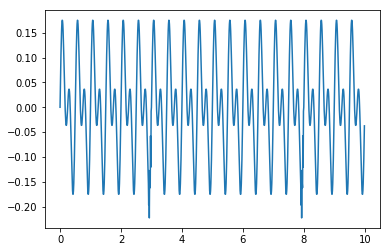

In [208]:
f = 2
s1 = 0.1 * np.sin(2*f * np.pi * t)  # the signal
f = 4
s2 = 0.1 * np.sin(2*f * np.pi * t)  # the signal

new_s = s1 + s2 + builp_anom

plt.plot(t, new_s)
# plt.plot(t[0:100], s[0:100])
plt.show()

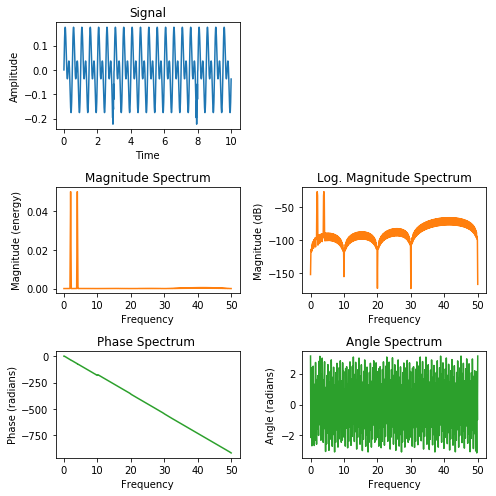

In [209]:
multiplot(t, new_s, Fs)

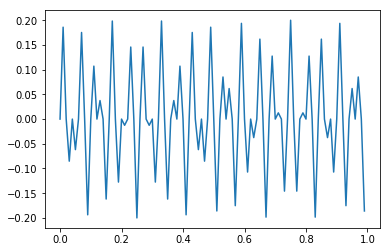

In [215]:
f = 19
s1 = 0.1 * np.sin(2*f * np.pi * t)  # the signal
f = 31
s2 = 0.1 * np.sin(2*f * np.pi * t)  # the signal

new_s = s1 + s2 + builp_anom

plt.plot(t[0:100], new_s[0:100])
# plt.plot(t[0:1000], s)
plt.show()

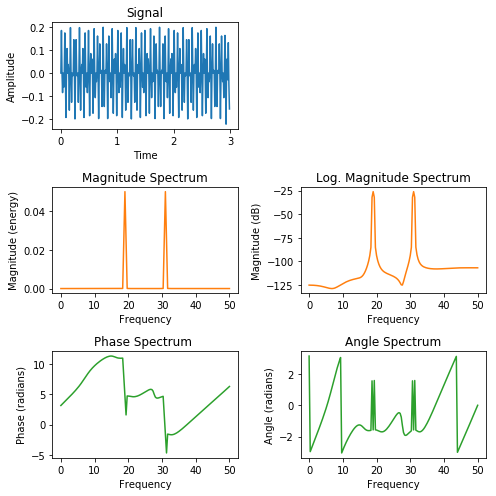

In [211]:
multiplot(t[0:300], new_s[0:300], Fs)
# multiplot(t[0:62], new_s[0:62], Fs)
# multiplot(t[0:90], new_s[0:90], Fs)

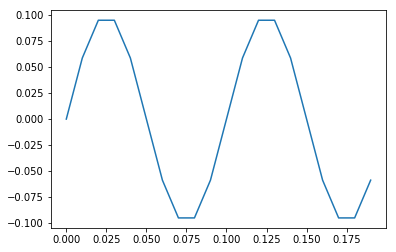

In [212]:
f = 310
s1 = 0.1 * np.sin(2*f * np.pi * t)  # the signal

new_s = s1 

plt.plot(t[0:20], new_s[0:20])
# plt.plot(t[0:1000], s)
plt.show()

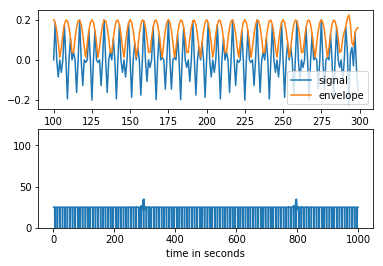

In [225]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp

duration = 1.0
# fs = 400.0
fs = 100.0
# samples = int(fs*duration)
samples = 1000
t = np.arange(samples) 

# signal = chirp(t, 20.0, t[-1], 100.0)
# signal *= (1.0 + 0.5 * np.sin(2.0*np.pi*3.0*t) )
signal = new_s

analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = (np.diff(instantaneous_phase) /
                           (2.0*np.pi) * fs)

fig = plt.figure()
ax0 = fig.add_subplot(211)
# ax0.plot(t, signal, label='signal')
# ax0.plot(t, amplitude_envelope, label='envelope')
ax0.plot(t[100:300], signal[100:300], label='signal')
ax0.plot(t[100:300], amplitude_envelope[100:300], label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()
ax1 = fig.add_subplot(212)
ax1.plot(t[1:], instantaneous_frequency)
ax1.set_xlabel("time in seconds")
ax1.set_ylim(0.0, 120.0)
plt.show()

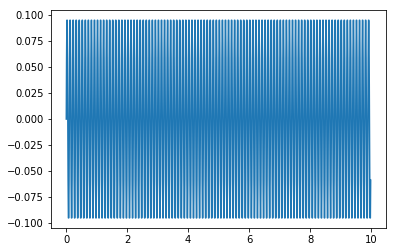

In [239]:
dt = 0.01  # sampling interval
Fs = 1 / dt  # sampling frequency
f = 10 # frequency
A = 0.1 # Amplitude
t = np.arange(0, 10, dt)

ss = A * np.sin(2 * np.pi * f * t)  # the signal
plt.plot(t, ss)
plt.show()


# f = 1
# s11 = 0.1 * np.sin(2*f * np.pi * t) 
# plt.plot(t, s11)
# plt.show()

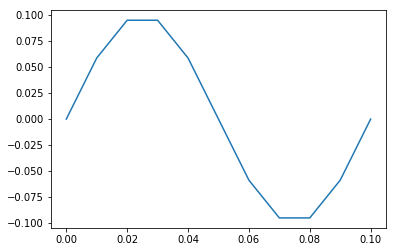

In [241]:
plt.plot(t[0:11], ss[0:11])
plt.show()